In [3]:
!pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 4.7 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.8 MB/s  0:00:00 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [albumentations]m [albumentations]eadless]


In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

2025-09-21 22:44:03.439984: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-21 22:44:03.494525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758474843.517937 1592301 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758474843.524780 1592301 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758474843.544615 1592301 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


# Reading input data

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

NameError: name 'data_dir_train' is not defined

In [ ]:
import cv2 
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data_path_train= 'balanced/train/'

In [9]:
    classes_train=os.listdir(data_path_train)
    dic_train={}
    for i in classes_train:
        dic_train[i]= len(os.listdir(os.path.join(data_path_train,i)))
    for key,value in dic_train.items():
        print(key,":",value,"\n")

Atopic Dermatitis Photos : 900 

Systemic Disease : 900 

Exanthems and Drug Eruptions : 900 

Warts Molluscum and other Viral Infections : 900 

Acne and Rosacea Photos : 900 

Urticaria Hives : 900 

Herpes HPV and other STDs Photos : 900 

Poison Ivy Photos and other Contact Dermatitis : 900 

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 900 

Scabies Lyme Disease and other Infestations and Bites : 900 

Light Diseases and Disorders of Pigmentation : 900 

Tinea Ringworm Candidiasis and other Fungal Infections : 900 

Eczema Photos : 900 

Vasculitis Photos : 900 

Nail Fungus and other Nail Disease : 900 

Hair Loss Photos Alopecia and other Hair Diseases : 900 

Lupus and other Connective Tissue diseases : 900 

Vascular Tumors : 900 

Seborrheic Keratoses and other Benign Tumors : 900 

Cellulitis Impetigo and other Bacterial Infections : 900 

Melanoma Skin Cancer Nevi and Moles : 900 

Bullous Disease Photos : 900 

Psoriasis pictures Lichen Planus and r

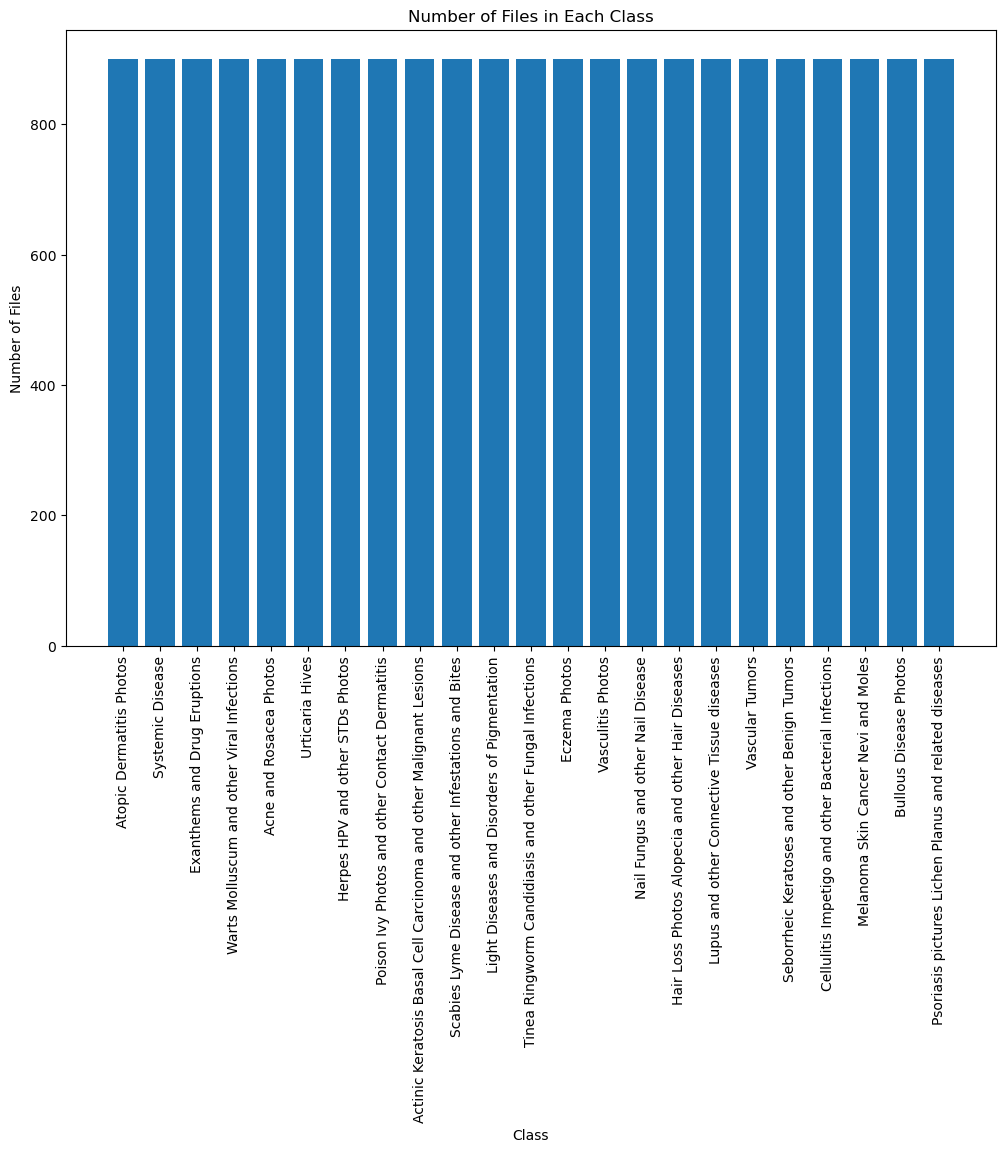

In [10]:
plt.figure(figsize=(12, 8))
plt.bar(dic_train.keys(), dic_train.values())
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Class')
plt.show()

In [11]:
data_path_test= 'balanced/test/'

In [12]:
    classes_test=os.listdir(data_path_test)
    dic_test={}
    for i in classes_test:
        dic_test[i]= len(os.listdir(os.path.join(data_path_test,i)))
    for key,value in dic_test.items():
        print(key,":",value,"\n")

Atopic Dermatitis Photos : 200 

Systemic Disease : 200 

Exanthems and Drug Eruptions : 200 

Warts Molluscum and other Viral Infections : 200 

Acne and Rosacea Photos : 200 

Urticaria Hives : 200 

Herpes HPV and other STDs Photos : 200 

Poison Ivy Photos and other Contact Dermatitis : 200 

Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions : 200 

Scabies Lyme Disease and other Infestations and Bites : 200 

Light Diseases and Disorders of Pigmentation : 200 

Tinea Ringworm Candidiasis and other Fungal Infections : 200 

Eczema Photos : 200 

Vasculitis Photos : 200 

Nail Fungus and other Nail Disease : 200 

Hair Loss Photos Alopecia and other Hair Diseases : 200 

Lupus and other Connective Tissue diseases : 200 

Vascular Tumors : 200 

Seborrheic Keratoses and other Benign Tumors : 200 

Cellulitis Impetigo and other Bacterial Infections : 200 

Melanoma Skin Cancer Nevi and Moles : 200 

Bullous Disease Photos : 200 

Psoriasis pictures Lichen Planus and r

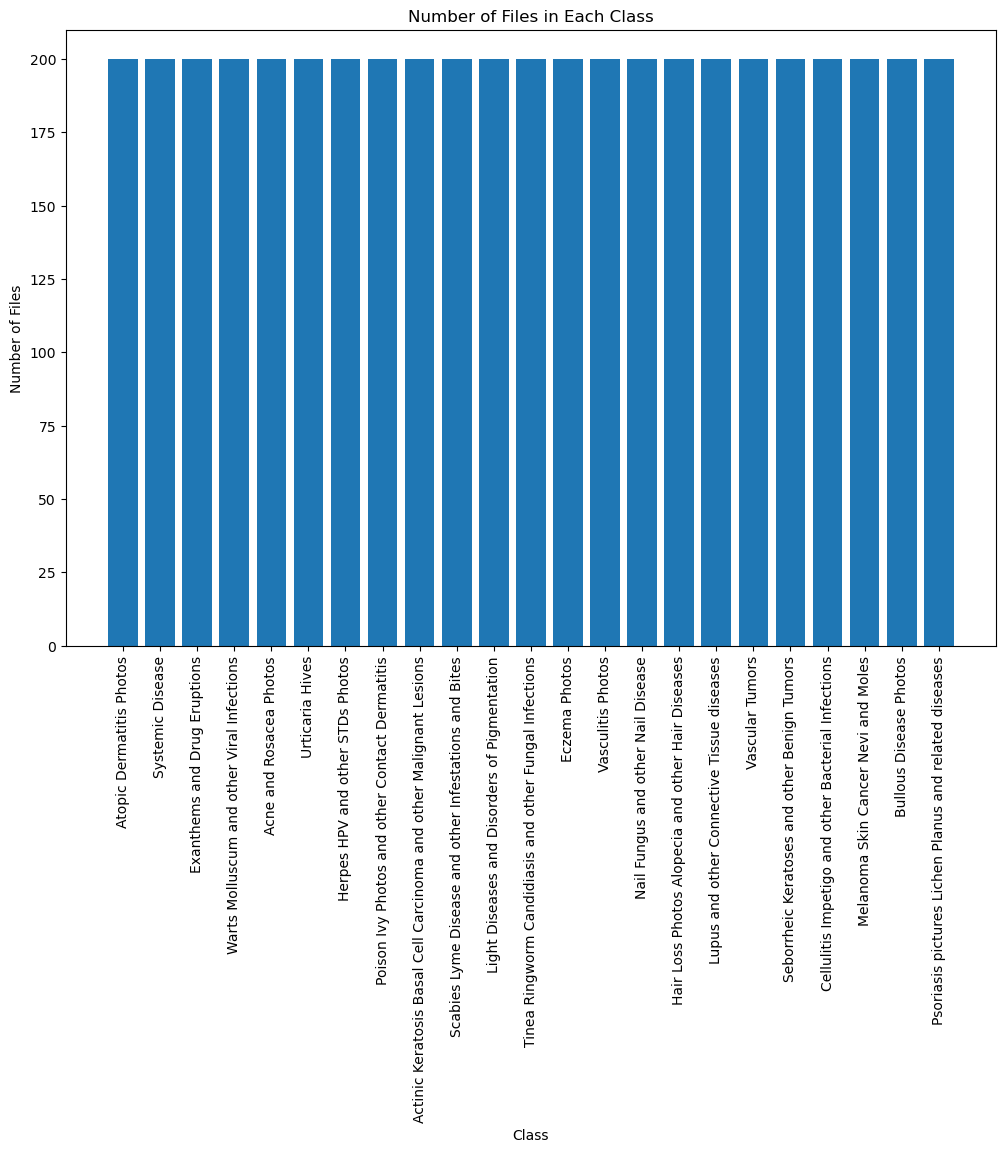

In [13]:
plt.figure(figsize=(12, 8))
plt.bar(dic_test.keys(), dic_test.values())
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Class')
plt.show()

In [4]:
import os
import random
import shutil
from pathlib import Path
import cv2
import albumentations as A

# Paths
train_dir = Path("skin disease/train")
test_dir = Path("skin disease/test")
balanced_train = Path("balanced/train")
balanced_val = Path("balanced/val")
balanced_test = Path("balanced/test")

# Desired counts
TRAIN_TARGET = 900
VAL_TARGET = 200
TEST_TARGET = 200

# Augmentation pipeline
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.RandomRotate90(p=0.5),
    A.ColorJitter(p=0.3),
    A.RandomBrightnessContrast(p=0.3),
    A.Blur(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=25, p=0.5),
])

def save_augmented(img_path, save_dir, count_needed):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    base_name = img_path.stem
    ext = img_path.suffix

    for i in range(count_needed):
        augmented = augment(image=img)["image"]
        save_path = save_dir / f"{base_name}_aug{i}{ext}"
        cv2.imwrite(str(save_path), cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

def balance_class(src_dir, dst_train, dst_val, dst_test,
                  train_target, val_target, test_target):
    os.makedirs(dst_train, exist_ok=True)
    os.makedirs(dst_val, exist_ok=True)
    os.makedirs(dst_test, exist_ok=True)

    files = list(src_dir.glob("*.jpg")) + list(src_dir.glob("*.png")) + list(src_dir.glob("*.jpeg"))
    random.shuffle(files)

    # Train
    if len(files) >= train_target:
        train_files = random.sample(files, train_target)
    else:
        train_files = files.copy()
        save_augmented(random.choice(files), dst_train, train_target - len(files))

    # Validation
    if len(files) >= val_target:
        val_files = random.sample(files, val_target)
    else:
        val_files = files.copy()
        save_augmented(random.choice(files), dst_val, val_target - len(files))

    # Test
    if len(files) >= test_target:
        test_files = random.sample(files, test_target)
    else:
        test_files = files.copy()
        save_augmented(random.choice(files), dst_test, test_target - len(files))

    # Copy originals
    for f in train_files:
        shutil.copy(f, dst_train / f.name)
    for f in val_files:
        shutil.copy(f, dst_val / f.name)
    for f in test_files:
        shutil.copy(f, dst_test / f.name)

# Loop through all classes
for class_name in os.listdir(train_dir):
    class_src = train_dir / class_name
    balance_class(class_src,
                  balanced_train / class_name,
                  balanced_val / class_name,
                  balanced_test / class_name,
                  TRAIN_TARGET,
                  VAL_TARGET,
                  TEST_TARGET)

print("✅ Balanced dataset created with augmentation!")


/home/22adr093/.local/lib/python3.11/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


✅ Balanced dataset created with augmentation!
